In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import joblib

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error , r2_score

In [3]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.0,1.0,1.0,0.333333,1.000000,1.0,0.0,...,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,...,0.0,0.75,1.0,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.0,1.0,1.0,0.000000,0.333333,1.0,0.0,...,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.0,1.0,1.0,0.666667,0.666667,1.0,0.0,...,0.0,0.00,1.0,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.0,1.0,1.0,0.333333,0.333333,1.0,0.0,...,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [5]:
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')
y_train.head()

,SalePrice
0,12.211060
1,11.887931
2,12.675764
3,12.278393
4,12.103486


In [11]:
features = pd.read_csv('selected_features.csv')
features = features['0'].to_list()

features

['MSSubClass',
 'Neighborhood',
 'OverallQual',
 'YearRemodAdd',
 'RoofStyle',
 'BsmtExposure',
 'BsmtFinType1',
 'CentralAir',
 'GrLivArea',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars']

In [12]:
X_train = X_train[features]
X_test = X_test[features]

In [13]:
model = Lasso(alpha=0.01,random_state=0)

model.fit(X_train,y_train)

Lasso(alpha=0.01, random_state=0)

In [15]:
pred = model.predict(X_train)

print('train mse:{}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred)))))
print('train rmse:{}'.format(int(mean_squared_error(np.exp(y_train),np.exp(pred),squared=False))))
print('train r2:{}'.format(r2_score(np.exp(y_train),np.exp(pred))))

print()

pred = model.predict(X_test)

print('test mse:{}'.format(int(mean_squared_error(np.exp(y_test),np.exp(pred)))))
print('test rmse:{}'.format(int(mean_squared_error(np.exp(y_test),np.exp(pred),squared=False))))
print('test r2:{}'.format(r2_score(np.exp(y_test),np.exp(pred))))
print()

train mse:1513930275
train rmse:38909
train r2:0.7575318641379039

test mse:2048065772
test rmse:45255
test r2:0.7019744741245351



Text(0.5, 1.0, 'Evalution of Lasso Predictions')

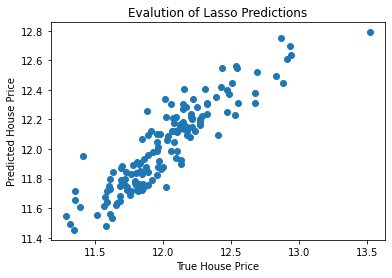

In [16]:
plt.scatter(y_test,model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evalution of Lasso Predictions')

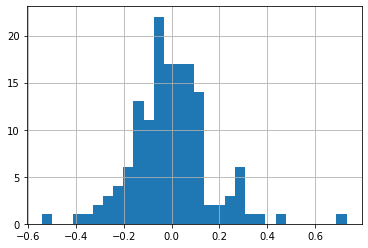

In [19]:
## distribution of errors
errors = y_test['SalePrice']-pred
errors.hist(bins=30)
plt.show()

Text(0.5, 1.0, 'feature imporatance')

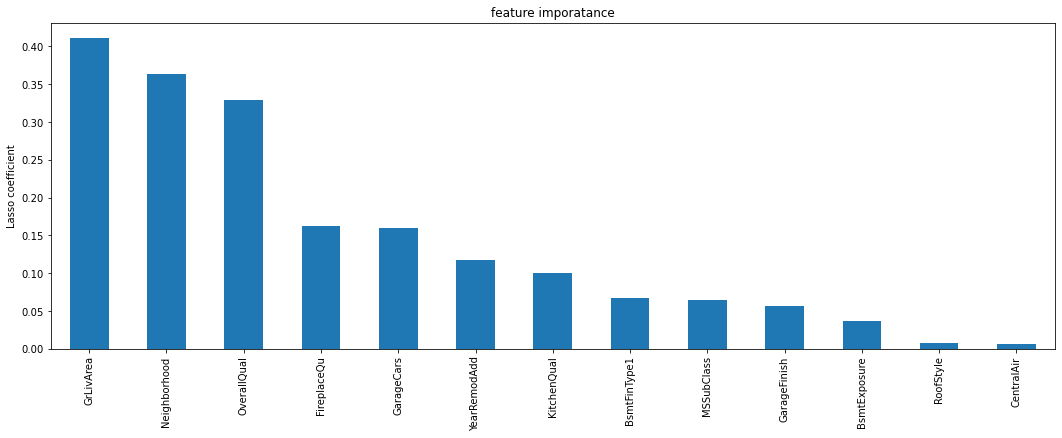

In [22]:
## feature importance
importance = pd.Series(np.abs(model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True,ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso coefficient')
plt.title('feature imporatance')

In [23]:
## save the model
joblib.dump(model,'lasso.joblib')

['lasso.joblib']